# DEMO_D Exploration

[Demo_D documentation](https://wwwn.cdc.gov/nchs/nhanes/2005-2006/DEMO_D.htm)

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import utils  # Utility functions we will use

%matplotlib inline
%config InlineBackend.figure_format = 'svg'

pd.set_option('max.rows', 100)
pd.set_option('max.columns', 100)

# Change this location to the path where you would like your data saved to
data_dir = '../data'
hdf_path = 'nhanes.h5'  # Path to hdf store we will create later

In [2]:
demo_df = pd.read_hdf(os.path.join(data_dir, hdf_path),
                      'demographics_with_sample_weights')

demo_df.head()

,seqn,sddsrvyr,ridstatr,ridexmon,riagendr,ridageyr,ridagemn,ridageex,ridreth1,dmqmilit,dmdborn,dmdcitzn,dmdyrsus,dmdeduc3,dmdeduc2,dmdschol,dmdmartl,dmdhhsiz,dmdfmsiz,indhhinc,indfminc,indfmpir,ridexprg,dmdhrgnd,dmdhrage,dmdhrbrn,dmdhredu,dmdhrmar,dmdhsedu,sialang,siaproxy,siaintrp,fialang,fiaproxy,fiaintrp,mialang,miaproxy,miaintrp,aialang,wtint2yr,wtmec2yr,sdmvpsu,sdmvstra
0,31127,4.0,2.0,2.0,1.0,5.397605e-79,11.0,12.0,3.0,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,4.0,4.0,4.0,4.0,0.75,NaN,2.0,21.0,1.0,3.0,1.0,2.0,1.0,1.0,2.0,1.0,2.0,2.0,NaN,NaN,NaN,NaN,6434.950248,6571.396373,2.0,44.0
1,31128,4.0,2.0,1.0,2.0,1.100000e+01,132.0,132.0,4.0,NaN,1.0,1.0,NaN,4.0,NaN,1.0,NaN,7.0,6.0,8.0,5.0,0.77,2.0,1.0,47.0,1.0,2.0,NaN,NaN,1.0,1.0,2.0,1.0,2.0,2.0,1.0,2.0,2.0,1.0,9081.700761,8987.041810,1.0,52.0
2,31129,4.0,2.0,2.0,1.0,1.500000e+01,189.0,190.0,4.0,NaN,1.0,1.0,NaN,10.0,NaN,1.0,5.0,6.0,6.0,10.0,10.0,2.71,NaN,1.0,41.0,1.0,4.0,1.0,4.0,1.0,1.0,2.0,1.0,2.0,2.0,1.0,2.0,2.0,1.0,5316.895215,5586.719481,1.0,51.0
3,31130,4.0,2.0,2.0,2.0,8.500000e+01,NaN,NaN,3.0,2.0,1.0,1.0,NaN,NaN,4.0,NaN,2.0,1.0,1.0,4.0,4.0,1.99,NaN,2.0,85.0,1.0,4.0,2.0,NaN,1.0,2.0,2.0,1.0,2.0,2.0,NaN,NaN,NaN,NaN,29960.839509,34030.994786,2.0,46.0
4,31131,4.0,2.0,2.0,2.0,4.400000e+01,535.0,536.0,4.0,2.0,1.0,1.0,NaN,NaN,4.0,NaN,1.0,4.0,4.0,11.0,11.0,4.65,2.0,1.0,36.0,1.0,5.0,1.0,4.0,1.0,2.0,2.0,1.0,2.0,2.0,1.0,2.0,2.0,1.0,26457.708180,26770.584605,1.0,48.0


In [3]:
# read in demo metadata from url
demo_metadata_url = 'https://wwwn.cdc.gov/nchs/nhanes/search/variablelist.aspx?Component=Demographics&CycleBeginYear=2005'
demo_metadata = pd.read_html(demo_metadata_url)[1]

# filter out non-'DEMO_D' metadata
demo_metadata = demo_metadata[demo_metadata['Data File Name'] == 'DEMO_D']

In [4]:
# Get column descriptions in dict for easy mapping, str.lower() Variable Names to match demo_df column names
column_descriptions = dict(zip(demo_metadata['Variable Name'].str.lower(),
                               demo_metadata['Variable Description']))

In [5]:
# print column descriptions for columns of interest
col_of_interest = ['ridreth1', 'ridageyr']

for col in col_of_interest:
    print(f'{field}: {column_descriptions[field]}', '\n')

ridreth1: Recode of reported race and ethnicity information. 

ridageyr: Best age in years of the sample person at time of HH screening. Individuals 85 and over are topcoded at 85 years of age. 



Text(0.5,1,'age by race violin plot, scaled within race')

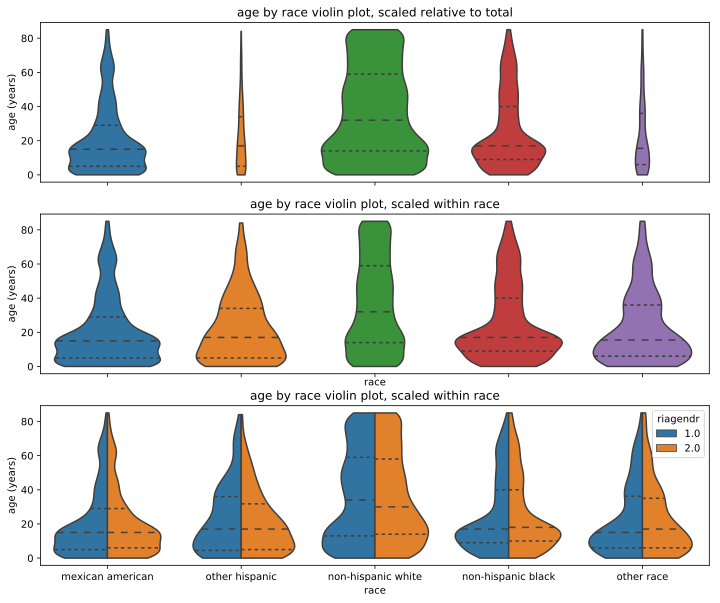

In [141]:
import seaborn as sns

f, axes = plt.subplots(3, 1, figsize=(12, 10), sharex=True, sharey=True)

sns.violinplot(x='ridreth1', y='ridageyr', data=demo_df,
               inner='quart', scale='count', cut=0, ax=axes[0])
axes[0].set_xlabel('')
axes[0].set_ylabel('age (years)')
axes[0].set_title('age by race violin plot, scaled relative to total')

sns.violinplot(x='ridreth1', y='ridageyr', data=demo_df,
               inner='quart', cut=0, ax=axes[1])
axes[1].set_xlabel('race')
axes[1].set_ylabel('age (years)')
plt.xticks([0, 1, 2, 3, 4], ['mexican american', 'other hispanic',
                             'non-hispanic white', 'non-hispanic black', 'other race'])
axes[1].set_title('age by race violin plot, scaled within race')

sns.violinplot(x='ridreth1', y='ridageyr', hue='riagendr', data=demo_df, split=True,
               inner='quart', cut=0, ax=axes[2])
axes[2].set_xlabel('race')
axes[2].set_ylabel('age (years)')
plt.xticks([0, 1, 2, 3, 4], ['mexican american', 'other hispanic',
                             'non-hispanic white', 'non-hispanic black', 'other race'])
axes[2].set_title('age by race violin plot, scaled within race')
axes[2].set_legend()

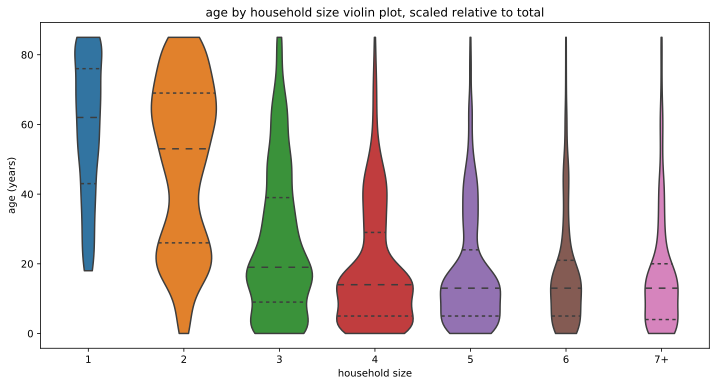

In [90]:
plt.figure(figsize=(12, 6))

sns.violinplot(x='dmdhhsiz', y='ridageyr', data=demo_df, inner='quart', cut=0, scale='count')
plt.xlabel('household size')
plt.ylabel('age (years)')
plt.xticks([0, 1, 2, 3, 4, 5, 6], ['1', '2', '3', '4', '5', '6', '7+'])
plt.title('age by household size violin plot, scaled relative to total');

In [136]:
householdsize_income_cross = pd.crosstab(demo_df.dmdhhsiz, demo_df.indhhinc)

householdsize_income_cross.index = ['1', '2', '3', '4', '5', '6', '7+']
householdsize_income_cross.columns = ['$0-4,999', '$5,000-9,999', '$10,000-14,999',
                                      '$15,000-19,999', '$20,000-24,999', '$25,000-34,999',
                                      '$35,000-44,999', '$45,000-54,999', '$55,000-64,999',
                                      '$65,000-74,999', '$75,000+', '>$20,000',
                                      '<$20,000', 'Refused', "Don't know"]

householdsize_income_cross = householdsize_income_cross.iloc[:,:-5]

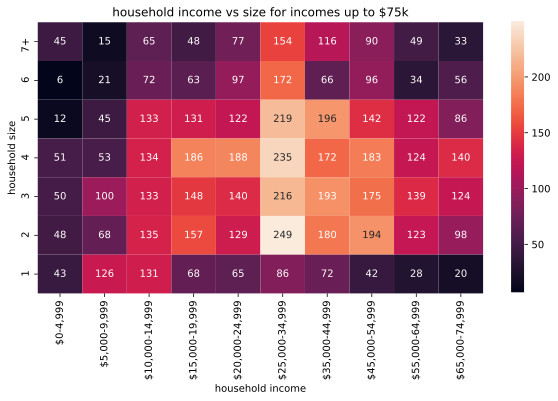

In [137]:
plt.figure(figsize=(10,5))
sns.heatmap(householdsize_income_cross.iloc[::-1,:], annot=True, fmt='d')
plt.xlabel('household income')
plt.ylabel('household size')
plt.title('household income vs size for incomes up to $75k');